In [1]:
dataset_path = r'H:\dataset\multi'
total_images = r'H:\kaggle_dataset\Covid19-dataset\data'

In [2]:
covid = ['COVID-00001', 'COVID-00003a', 'COVID-00017', 'COVID-00030', 'COVID-00036']
normal = ['0101', '0102', '0106', '0115', '0119']
Viral_Pneumonia = ['019', '096', '0113', '051', '066']

In [3]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader, SequentialSampler, random_split
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 300

In [4]:
from torch.utils.data import DataLoader, SequentialSampler, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from albumentations import Cutout
import imageio
import os
import torch
import random
from skimage import exposure

In [5]:
from imgaug import augmenters as iaa
import imgaug as ia


In [6]:
class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

In [7]:
dataset = ImageFolderWithPaths(total_images)
class_to_id = dataset.class_to_idx
id_to_class = dict(zip(class_to_id.values(), class_to_id.keys()))
id_to_class

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [8]:
def get_meta_data(dataset):
    image_count = {}
    image_size_count = {}
    extentions = {}
    image_extention_count = {}
    for image, label, path in dataset:
        #label count
        label = id_to_class[label]
        if label not in image_count:
            image_count[label] = 1 
        else:
            image_count[label] += 1

        #extention count
        extenstion = path.split('.')[-1]
        if extenstion not in extentions:
            extentions[extenstion] = 1  
        else:
            extentions[extenstion] += 1

        # image_extention_count
        if label not in image_extention_count:
            image_extention_count[label] = {}
            image_extention_count[label][extenstion] = 1
        else:
            if extenstion not in image_extention_count[label]:
                image_extention_count[label][extenstion] = 1
            else:
                image_extention_count[label][extenstion] += 1

        #image size count
        if image.size not in image_size_count:
            image_size_count[image.size] = 1
        else:
            image_size_count[image.size] += 1
    print(image_count)
    print(extentions)
    return image_count, extentions, image_size_count, image_extention_count

In [9]:
image_count, extentions, image_size_count, image_extention_count=get_meta_data(dataset)

{'Covid': 132, 'Normal': 90, 'Viral Pneumonia': 90}
{'jpeg': 238, 'png': 11, 'jpg': 63}


In [62]:
extentions

{'jpeg': 238, 'png': 11, 'jpg': 63}

In [61]:
90/132

0.6818181818181818

In [10]:
image_count

{'Covid': 132, 'Normal': 90, 'Viral Pneumonia': 90}

In [11]:
min_ = None
max_ = None
for size in image_size_count.keys():
    if not min_ :
        min_ = size[0]
        min_result = size
    if not max_ :
        max_ = size[1]
        max_result = size
    if size[0] < min_:
        min_ = size[0]
        min_result = size
    if size[1] > max_:
        max_ = size[1]
        max_result = size
min_, max_, min_result, max_result

(416, 4095, (416, 341), (3342, 4095))

In [12]:
min_ = None
max_ = None
for size in image_size_count.keys():
    if not min_ :
        min_ = size[1]
        min_result = size
    if not max_ :
        max_ = size[0]
        max_result = size
    if size[1] < min_:
        min_ = size[1]
        min_result = size
    if size[0] > max_:
        max_ = size[0]
        max_result = size
min_, max_, min_result, max_result

(341, 4248, (416, 341), (4248, 3480))

c:\users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


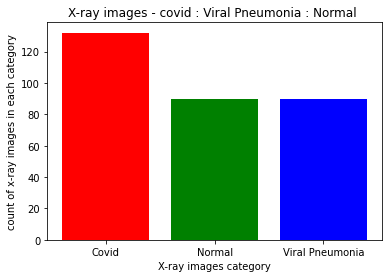

In [13]:
fig = plt.figure()
plt.bar(range(len(image_count)), list(image_count.values()), align='center', color='rgb')
plt.title("X-ray images - covid : Viral Pneumonia : Normal ")
plt.xlabel("X-ray images category")
plt.ylabel("count of x-ray images in each category")
plt.xticks(range(len(image_count)), list(image_count.keys()))
fig.savefig("eda_images\\count of x-ray images in each category.png", format='png',dpi=300)

c:\users\veere\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


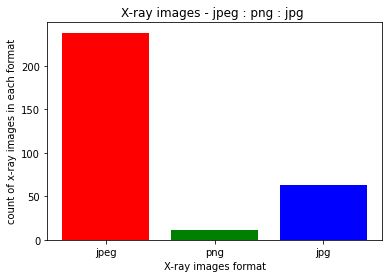

In [64]:
fig = plt.figure()
plt.bar(range(len(extentions)), list(extentions.values()), align='center', color='rgb')
plt.title("X-ray images - jpeg : png : jpg ")
plt.xlabel("X-ray images format")
plt.ylabel("count of x-ray images in each format")
plt.xticks(range(len(extentions)), list(extentions.keys()))
fig.savefig("eda_images\\count of x-ray images in each format.png", format='png',dpi=300)

In [63]:
extentions

{'jpeg': 238, 'png': 11, 'jpg': 63}

In [65]:
11/238

0.046218487394957986

In [66]:
63/238

0.2647058823529412

In [14]:
### images x-ray

In [15]:
# covid, normal, pnemonia

In [16]:
image_5_dict = {'Covid': ['COVID-00001', 'COVID-00003a', 'COVID-00017', 'COVID-00030'],#, 'COVID-00036'
'Normal' : ['0101', '0102', '0106', '0115'],#, '0119'
'Viral_Pneumonia' : ['019', '096', '0113', '051']}#, '066'
#Covid': 132, 'Normal': 90, 'Viral Pneumonia'

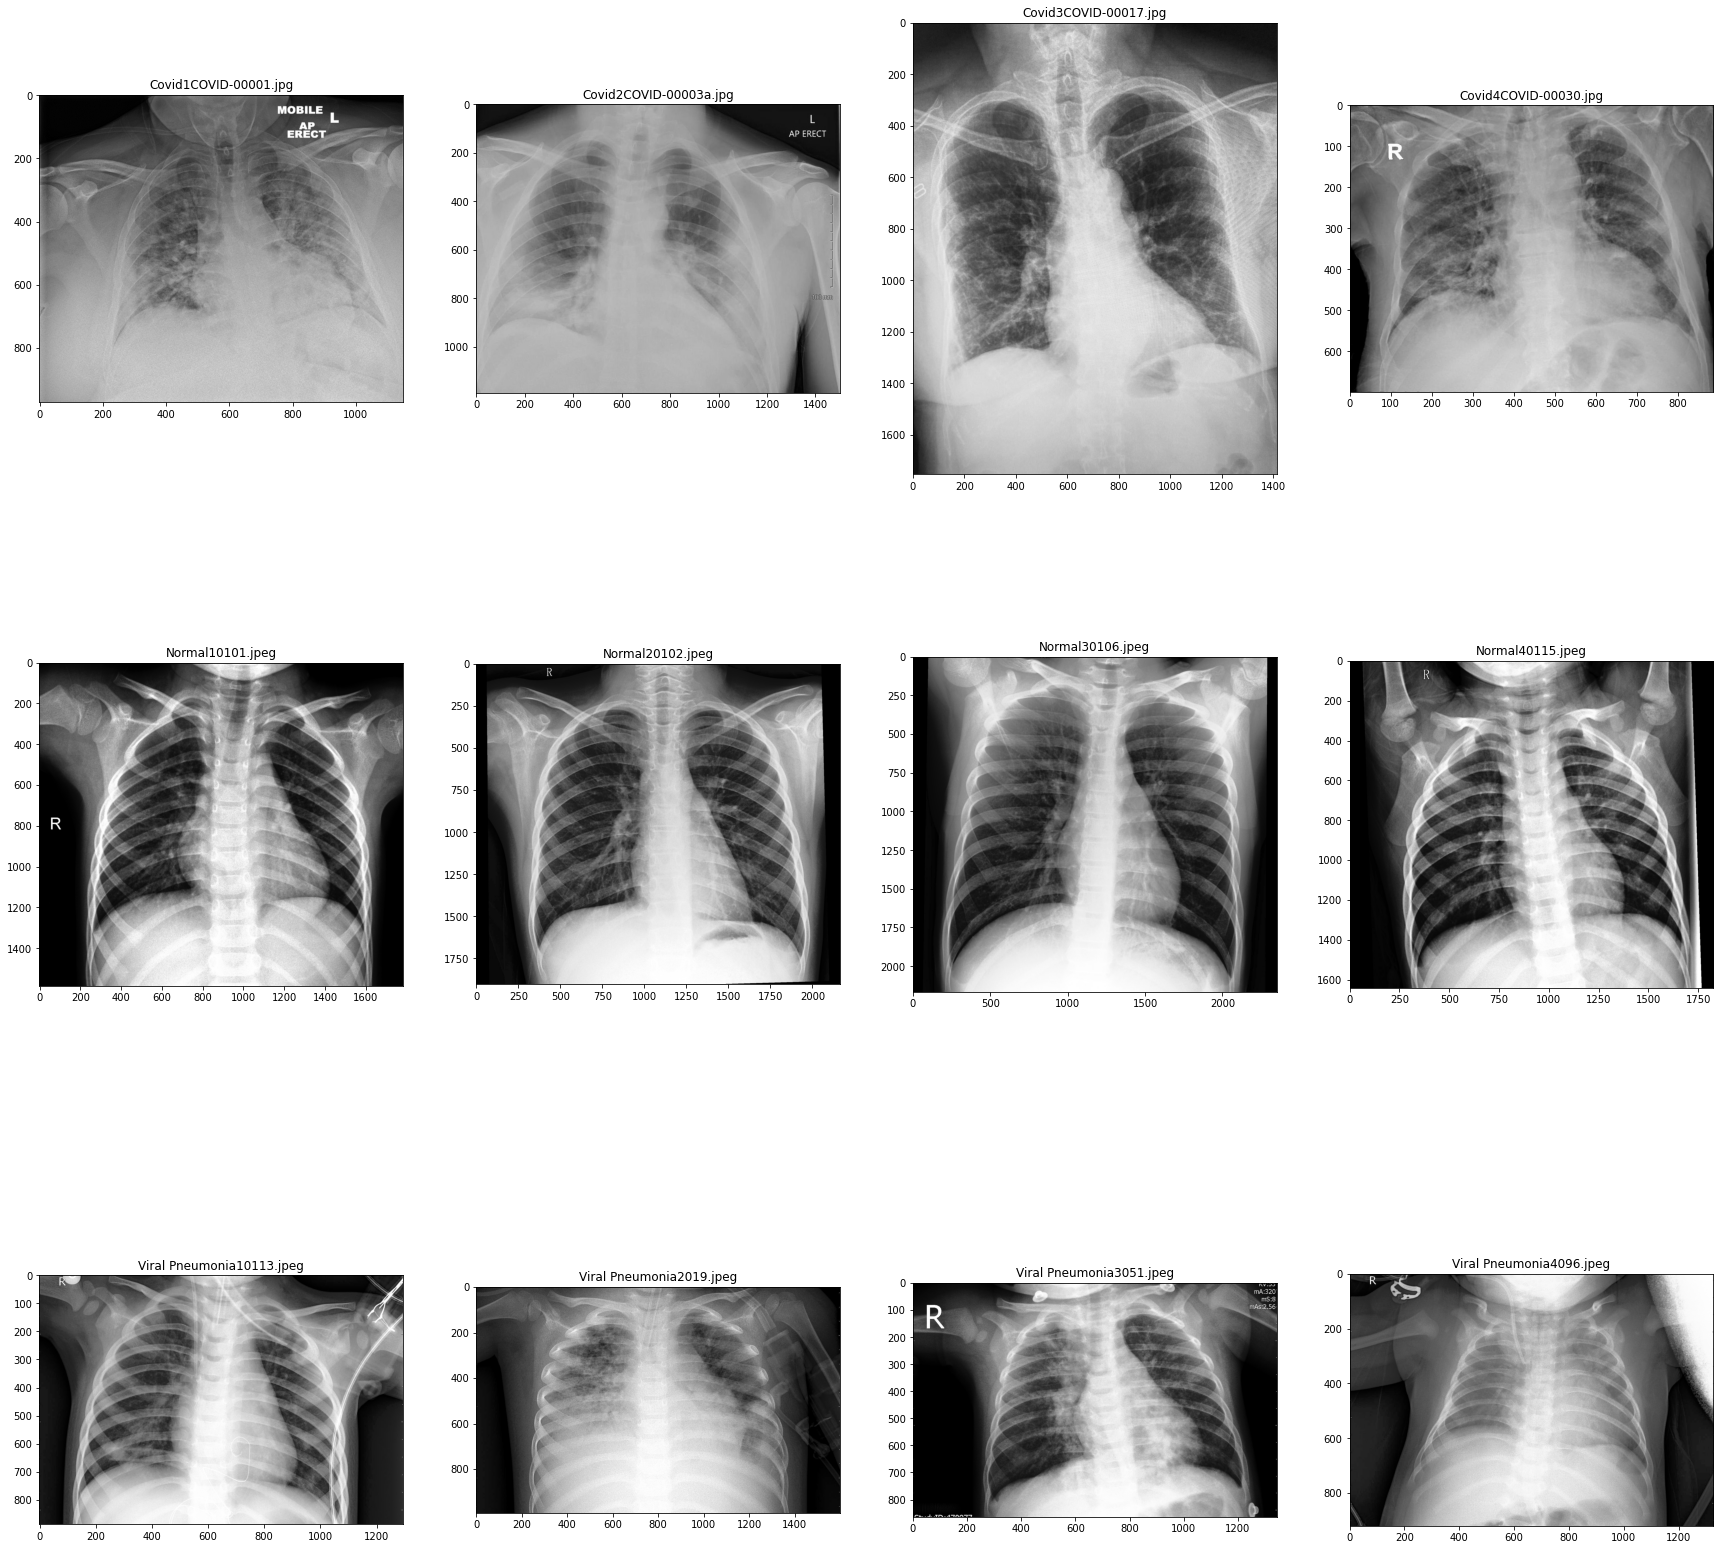

In [19]:
index = {}
count = 0
fig = plt.figure(figsize=(30,30))
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0] not in image_5_dict[label_name.replace(' ','_')]:
        continue
    
    if label not in index:
        index[label] = 1
    else:
        if index[label] >= 4:
            continue
        index[label] += 1
        
    plt.subplot(3,4,index[label] + 4*label)
    nu = index[label]
    plt.title(label_name+str(nu)+os.path.basename(path))
    plt.imshow(image)
    count+=1

fig.savefig('eda_images\\x-ray'+'.png', format='png', dpi=300)

In [20]:
count

12

In [21]:
# preprocess images 
# resize and crop

In [22]:
dataset_path = r'H:\dataset\multi\test'
dataset = ImageFolderWithPaths(dataset_path)
class_to_id = dataset.class_to_idx
id_to_class = dict(zip(class_to_id.values(), class_to_id.keys()))
id_to_class

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

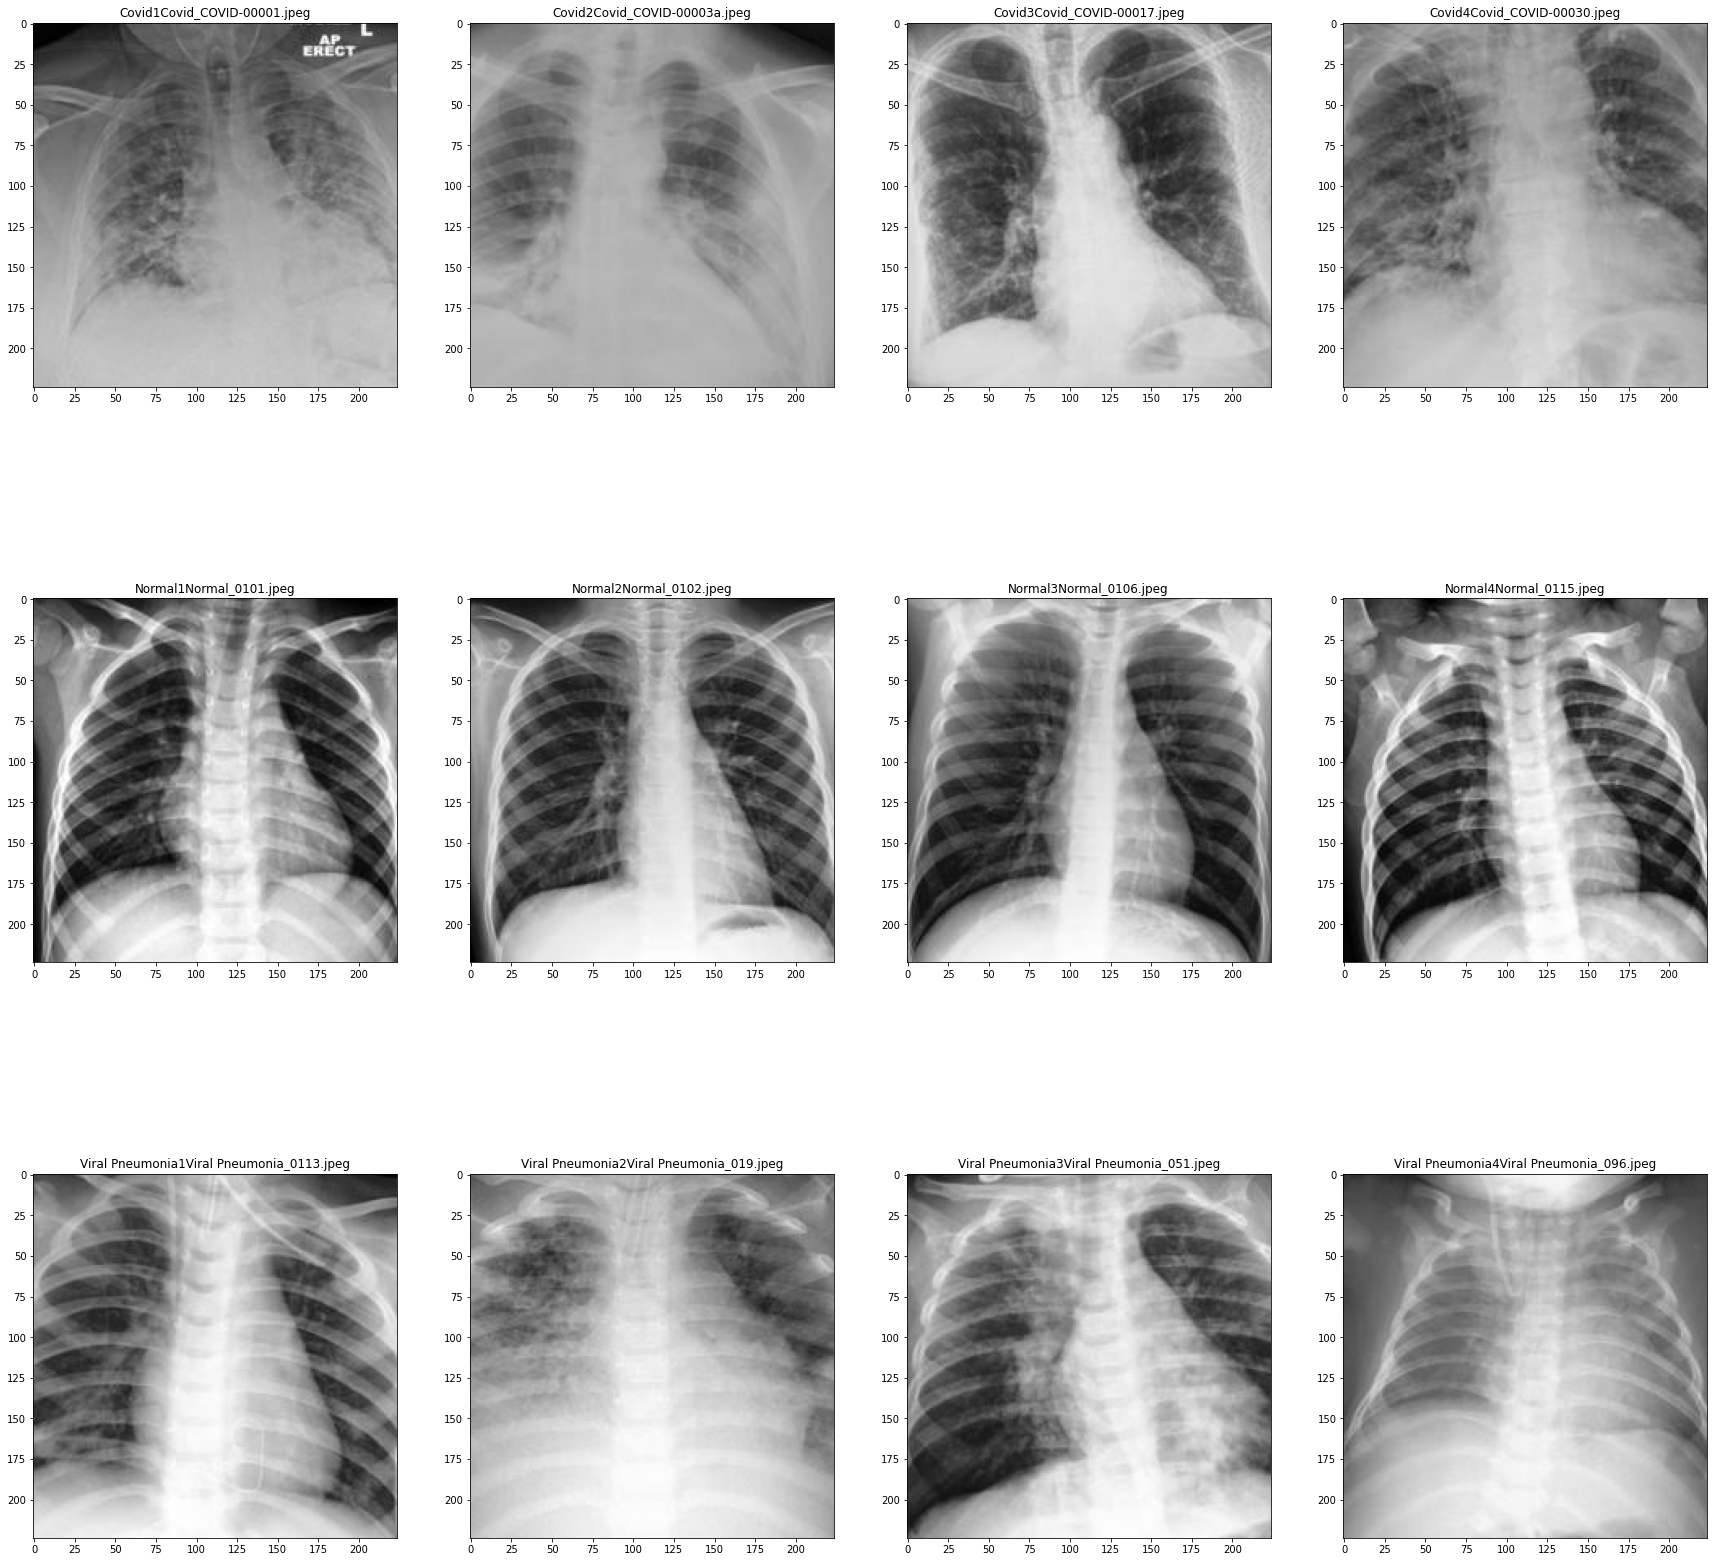

In [23]:
index = {}
fig = plt.figure(figsize=(30,30))
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')]:
        continue
    if label not in index:
        index[label] = 1
    else:
        if index[label] >= 4:
            continue
        index[label] += 1
        
    plt.subplot(3,4,index[label] + 4*label)
    nu = index[label]
    plt.title(label_name+str(nu)+os.path.basename(path))
    plt.imshow(image)

fig.savefig('eda_images\\preproces_x-ray'+'.png', format='png', dpi=300)

In [24]:
#split data and eda

In [72]:
dataset_path = os.path.join(os.getcwd(), 'kaggle_dataset', 'Covid19-dataset', 'data')
dataset=ImageFolderWithPaths(dataset_path)

In [73]:
n = len(dataset)  
n_test = int(0.3 * n)
train_dataset, test_dataset  = random_split(dataset, [n-n_test, n_test])
n = len(train_dataset)  
n_test = int(0.3 * n)
train_dataloader, val_dataloader  = random_split(train_dataset, [n-n_test, n_test])

In [74]:
class_to_id = dataset.class_to_idx
id_to_class = dict(zip(class_to_id.values(), class_to_id.keys()))
id_to_class

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [75]:
train_count, _,_,_ = get_meta_data(train_dataloader)
train_count

{'Normal': 45, 'Covid': 64, 'Viral Pneumonia': 45}
{'jpeg': 121, 'jpg': 28, 'png': 5}


{'Normal': 45, 'Covid': 64, 'Viral Pneumonia': 45}

In [76]:
val_count, _,_,_ = get_meta_data(val_dataloader)
val_count

{'Viral Pneumonia': 20, 'Covid': 27, 'Normal': 18}
{'jpeg': 50, 'jpg': 14, 'png': 1}


{'Viral Pneumonia': 20, 'Covid': 27, 'Normal': 18}

In [77]:
test_count, _,_,_ = get_meta_data(test_dataset)
test_count

{'Normal': 27, 'Covid': 41, 'Viral Pneumonia': 25}
{'jpeg': 67, 'jpg': 21, 'png': 5}


{'Normal': 27, 'Covid': 41, 'Viral Pneumonia': 25}

In [78]:
train_count = {k:[v] for k,v in train_count.items()}
val_count = {k:[v] for k,v in val_count.items()}
test_count = {k:[v] for k,v in test_count.items()}

In [79]:
import pandas as pd
train_df = pd.DataFrame(train_count)
train_df['category'] = 'train'

val_df = pd.DataFrame(val_count)
val_df['category'] = 'val'

test_df = pd.DataFrame(test_count)
test_df['category'] = 'test'


In [80]:
res_df = pd.concat([train_df, val_df, test_df])
res_df

Normal  Covid  Viral Pneumonia category
0      45     64               45    train
0      18     27               20      val
0      27     41               25     test

In [81]:
49+48+57

154

In [82]:
15+14+36

65

In [83]:
26+28+39

93

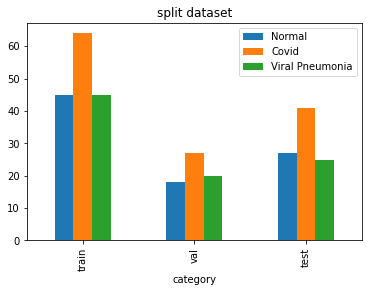

In [84]:
# plot grouped bar chart
# fig = plt.figure(figsize=(30,30))
fig = res_df.plot(x='category',
        kind='bar',
        stacked=False,
        title='split dataset')
fig = fig.get_figure()
fig.savefig('eda_images\\splitdataset.png', format='png', dpi=300)

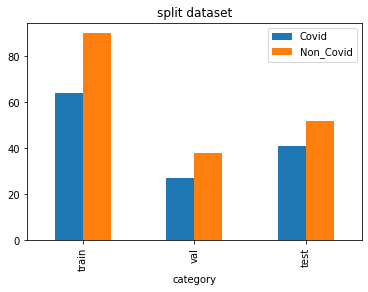

In [85]:
# plot grouped bar chart
# fig = plt.figure(figsize=(30,30))
res_df['Non_Covid'] = res_df['Normal'] + res_df['Viral Pneumonia']
del res_df['Normal'],res_df['Viral Pneumonia']
fig = res_df.plot(x='category',
        kind='bar',
        stacked=False,
        title='split dataset')
fig = fig.get_figure()
fig.savefig('eda_images\\binary_splitdataset.png', format='png', dpi=300)

In [86]:
res_df

Covid category  Non_Covid
0     64    train         90
0     27      val         38
0     41     test         52

In [35]:
# augmented data

In [36]:
#normal
#covid
#pneumonia # all forms

In [108]:

class ImgAugTransform:#cutout augmentation #
    
  def __init__(self):
    self.aug_s = iaa.Sequential([
        iaa.Sometimes(0.99, iaa.GaussianBlur(sigma=(0, 4.0))),
    ])
    self.aug_f = iaa.Sequential([
        iaa.Fliplr(0.1),
    ])
    self.aug_a = iaa.Sequential([
        iaa.Affine(rotate=(-10, 10), mode='symmetric'),
    ])
    self.aug_h = iaa.Sequential([
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])

    self.aug_h2 = iaa.Sequential([
        iaa.AddToHueAndSaturation(value=(-25, 25), per_channel=True)
    ])
#     self.aug_c = Cutout()
    self.aug_ot = Cutout(num_holes=15, max_h_size=4, max_w_size=4)
    
    self.aug_ot2 = Cutout(num_holes=10, max_h_size=6, max_w_size=6)
    
    self.img_eq = exposure.equalize_hist
    
    self.img_eq_ada = exposure.equalize_adapthist
    
  def __call__(self, img):
    img = np.array(img)
    img = [(self.aug_a.augment_image(img), 'affine'), (self.aug_f.augment_image(img), 'fliplr'), (self.aug_s.augment_image(img), 'gaussian'), (self.aug_h.augment_image(img), 'hue_saturation'), (self.aug_h2.augment_image(img), 'hue_saturation2'), (self.aug_ot(image=img)['image'], 'cut_out'), (self.aug_ot2(image=img)['image'], 'cut_out2'), (self.img_eq(image=img), 'img_eq'), (self.img_eq_ada(image=img, clip_limit=0.03), 'img_eq_ada')]
    return img
#
# transforms = ImgAugTransform()

In [109]:
def preprocess_augment_save_data(image):
    counter = 0
    images = []
    image_aug_transform = ImgAugTransform()
    aug_images = image_aug_transform.__call__(image)
    images = [(image, 'original')]+aug_images
    return images


In [102]:
# save images
dataset_path = r'H:\dataset\multi\test'
dataset = ImageFolderWithPaths(dataset_path)

c:\users\veere\.conda\envs\py37\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


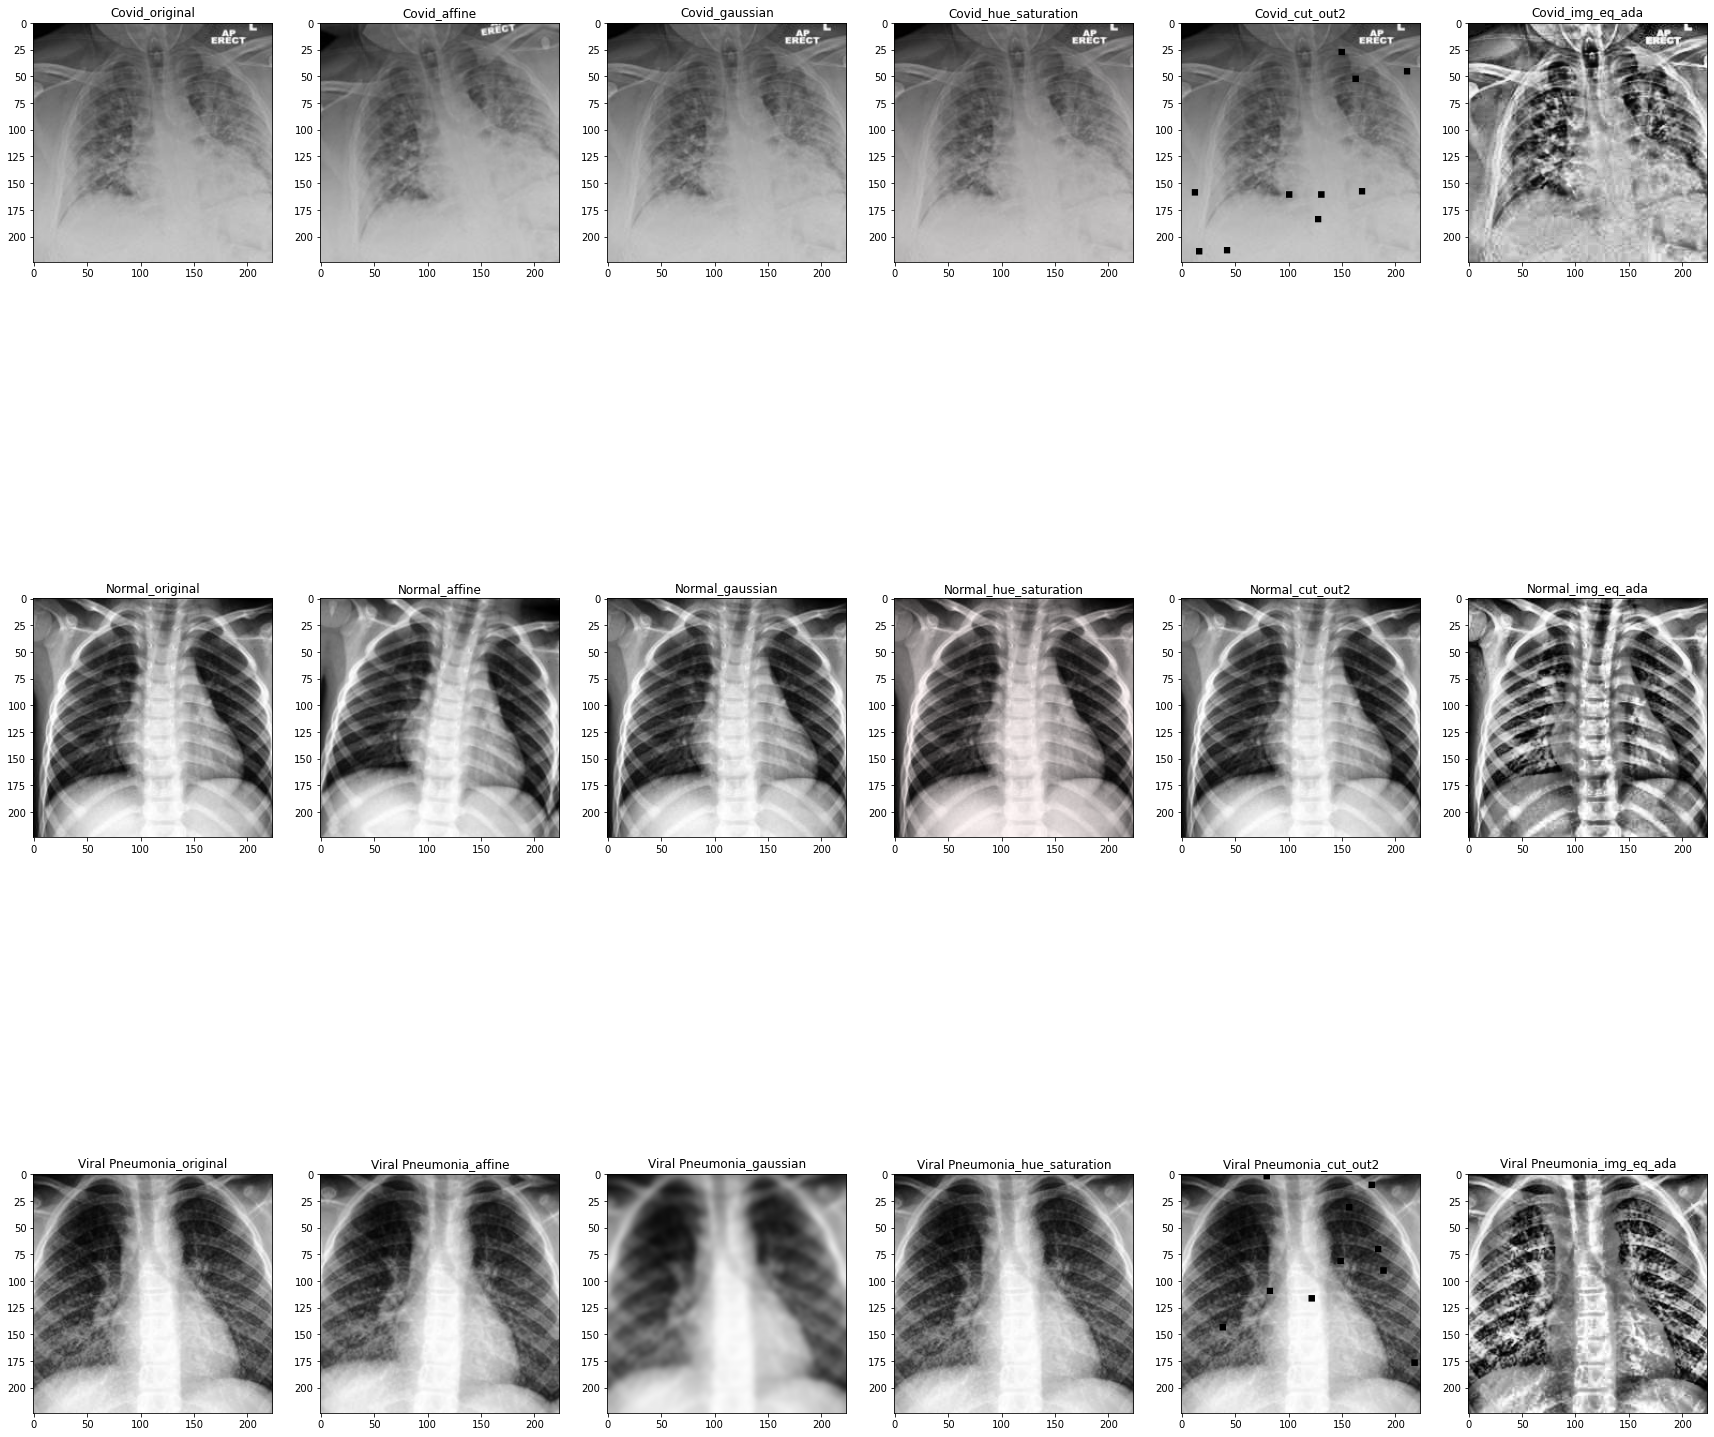

In [47]:
index = {}
fig = plt.figure(figsize=(30,30))
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][0]:
        continue
        
    if label not in index:
        index[label] = 1
    else:
        continue
        
    images = preprocess_augment_save_data(image)
    count = 1
    for image, title in images:
        if title in ['original', 'affine', 'gaussian', 'hue_saturation', 'cut_out2', 'img_eq_ada']:
            plt.subplot(3,6,count + 6*label)
            nu = index[label]
            plt.title(label_name+'_'+title)
            plt.imshow(image)
            count+=1

fig.savefig('eda_images\\aug_x-ray'+'.png', format='png', dpi=300)

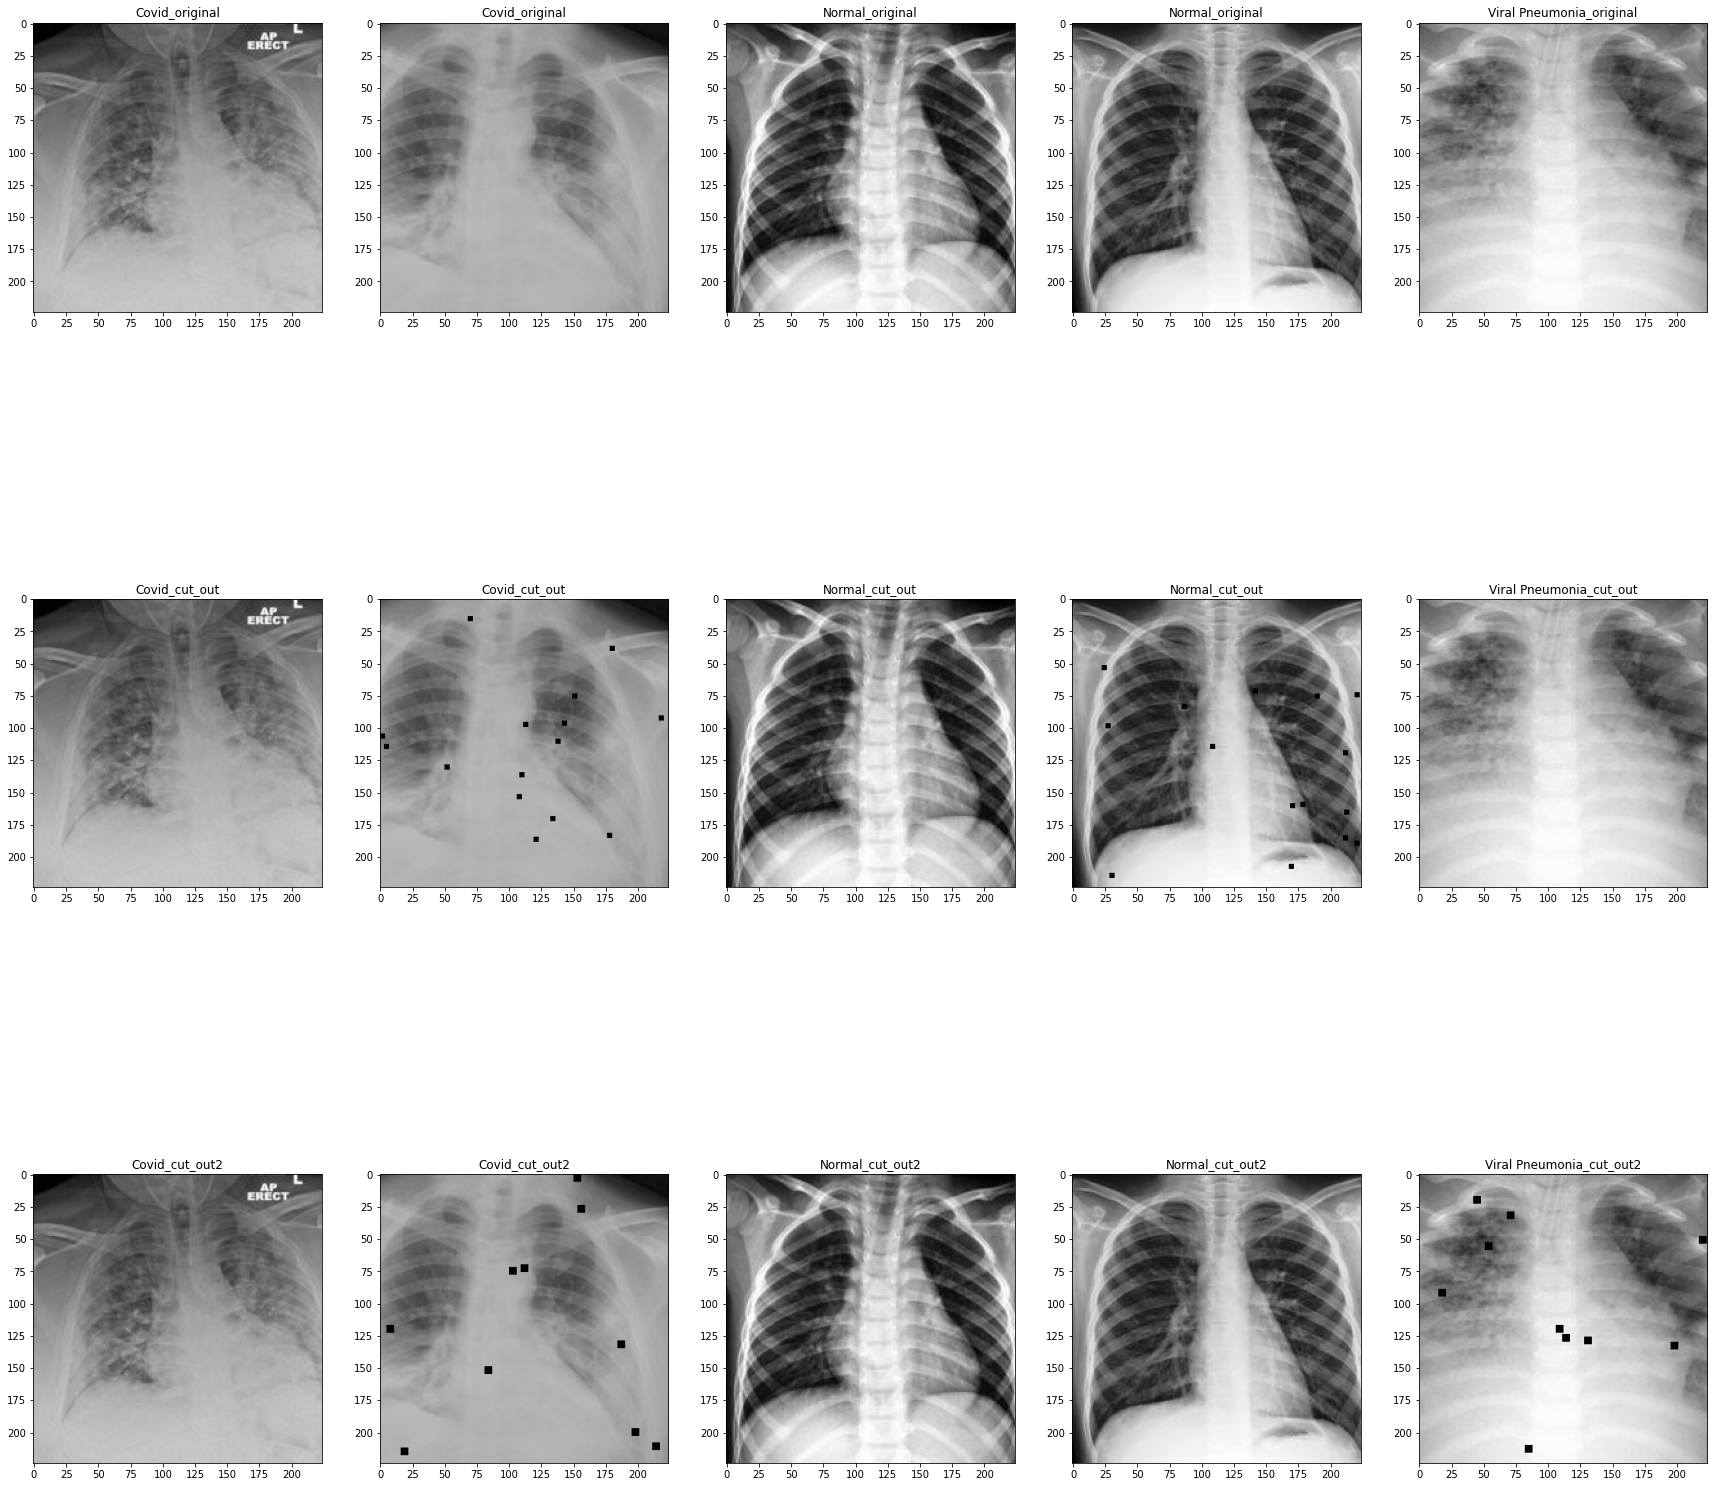

In [93]:
index = {}
fig = plt.figure(figsize=(30,30))
count = 1
original = 0
cut_out = 5
cut_out2 = 10
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][:2]:
        continue
        
    if label not in index:
        index[label] = 1
#     else:
#         continue
        
    images = preprocess_augment_save_data(image)
    for image, title in images:
        if title in ['original', 'cut_out', 'cut_out2']:
            if title=='original':
                original += 1
                index_ = original
            elif title=='cut_out':
                cut_out += 1
                index_ = cut_out
            elif title == 'cut_out2':
                cut_out2 += 1
                index_ = cut_out2 
            plt.subplot(3,5,index_)
            nu = index[label]
            plt.title(label_name+'_'+title)
            plt.imshow(image)
            count+=1
    if original == 5:
        break
fig.savefig('eda_images\\cut_out'+'.png', format='png', dpi=300)

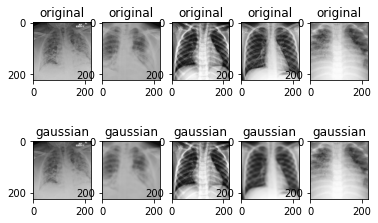

In [103]:
index = {}
fig = plt.figure()
# fig = plt.figure(figsize=(20,20))
count = 1
original = 0
gaussian = 5
cut_out2 = 10
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][:2]:
        continue
        
    if label not in index:
        index[label] = 1
#     else:
#         continue
        
    images = preprocess_augment_save_data(image)
    for image, title in images:
        if title in ['original', 'gaussian']:
            if title=='original':
                original += 1
                index_ = original
            elif title=='gaussian':
                gaussian += 1
                index_ = gaussian

            plt.subplot(2,5,index_)
            nu = index[label]
            plt.title(title)
            plt.imshow(image)
            count+=1
    if original == 5:
        break
fig.savefig('eda_images\\gaussian'+'.png', format='png', dpi=300)

<Figure size 432x288 with 0 Axes>

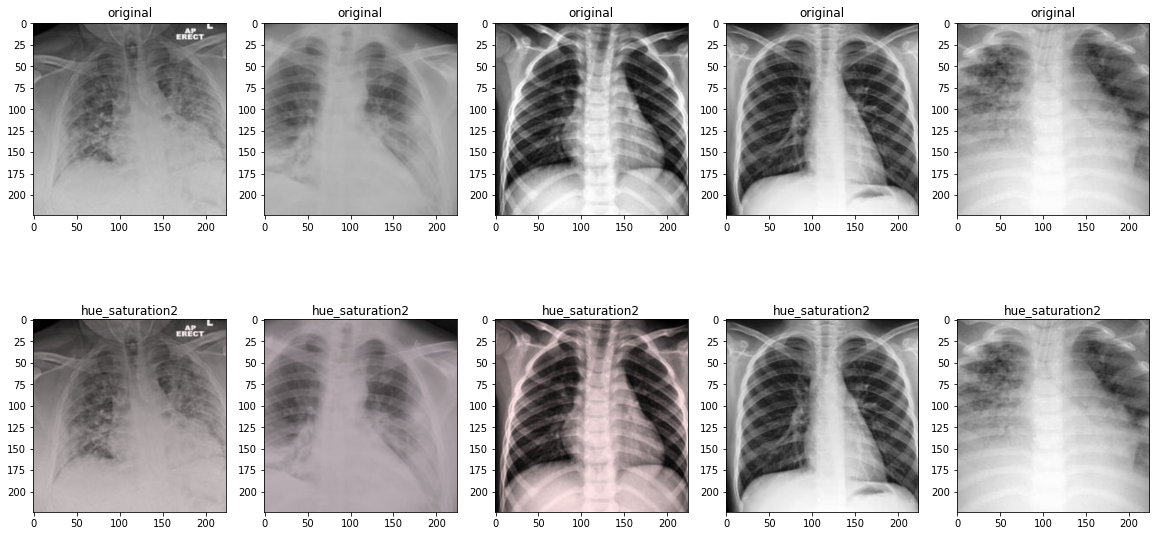

In [112]:
index = {}
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
count = 1
original = 0
hue_saturation2 = 5
cut_out2 = 10
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][:2]:
        continue
        
    if label not in index:
        index[label] = 1
#     else:
#         continue
        
    images = preprocess_augment_save_data(image)
    for image, title in images:
        if title in ['original', 'hue_saturation2']:
            if title=='original':
                original += 1
                index_ = original
            elif title=='hue_saturation2':
                hue_saturation2 += 1
                index_ = hue_saturation2

            plt.subplot(2,5,index_)
            nu = index[label]
            plt.title(title)
            plt.imshow(image)
            count+=1
    if original == 5:
        break
fig.savefig('eda_images\\hue_saturation'+'.png', format='png', dpi=300)

<Figure size 432x288 with 0 Axes>

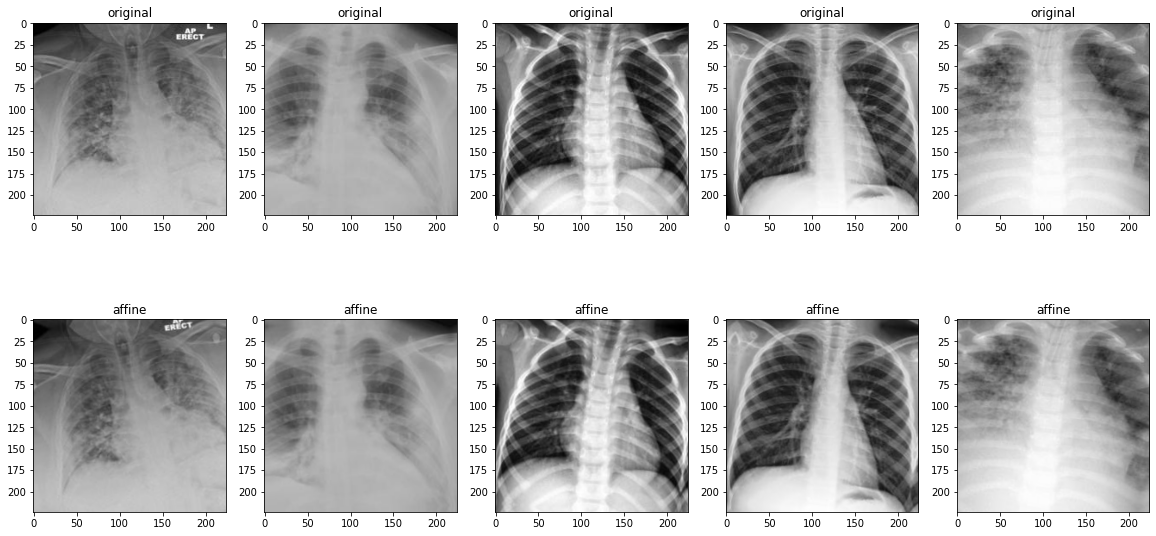

In [113]:
index = {}
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
count = 1
original = 0
affine = 5
cut_out2 = 10
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][:2]:
        continue
        
    if label not in index:
        index[label] = 1
#     else:
#         continue
        
    images = preprocess_augment_save_data(image)
    for image, title in images:
        if title in ['original', 'affine']:
            if title=='original':
                original += 1
                index_ = original
            elif title=='affine':
                affine += 1
                index_ = affine

            plt.subplot(2,5,index_)
            nu = index[label]
            plt.title(title)
            plt.imshow(image)
            count+=1
    if original == 5:
        break
fig.savefig('eda_images\\affine'+'.png', format='png', dpi=300)

In [ ]:
fliplr

<Figure size 432x288 with 0 Axes>

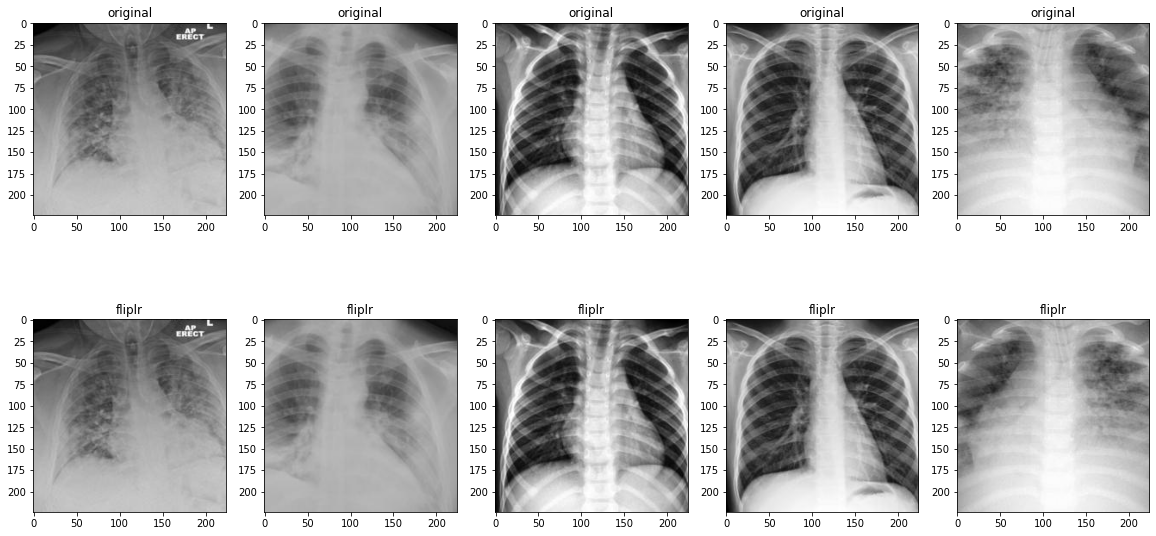

In [114]:
index = {}
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
count = 1
original = 0
fliplr = 5
cut_out2 = 10
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][:2]:
        continue
        
    if label not in index:
        index[label] = 1
#     else:
#         continue
        
    images = preprocess_augment_save_data(image)
    for image, title in images:
        if title in ['original', 'fliplr']:
            if title=='original':
                original += 1
                index_ = original
            elif title=='fliplr':
                fliplr += 1
                index_ = fliplr

            plt.subplot(2,5,index_)
            nu = index[label]
            plt.title(title)
            plt.imshow(image)
            count+=1
    if original == 5:
        break
fig.savefig('eda_images\\fliplr'+'.png', format='png', dpi=300)

<Figure size 432x288 with 0 Axes>

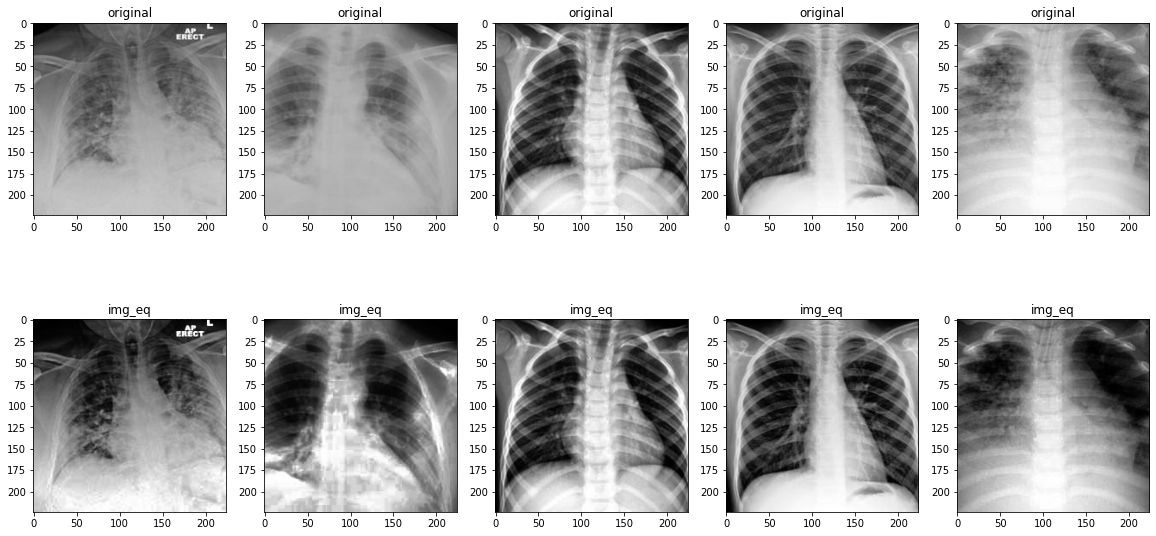

In [117]:
index = {}
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
count = 1
original = 0
img_eq = 5
cut_out2 = 10
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][:2]:
        continue
        
    if label not in index:
        index[label] = 1
#     else:
#         continue
        
    images = preprocess_augment_save_data(image)
    for image, title in images:
        if title in ['original', 'img_eq']:
            if title=='original':
                original += 1
                index_ = original
            elif title=='img_eq':
                img_eq += 1
                index_ = img_eq

            plt.subplot(2,5,index_)
            nu = index[label]
            plt.title(title)
            plt.imshow(image)
            count+=1
    if original == 5:
        break
fig.savefig('eda_images\\img_eq'+'.png', format='png', dpi=300)

<Figure size 432x288 with 0 Axes>

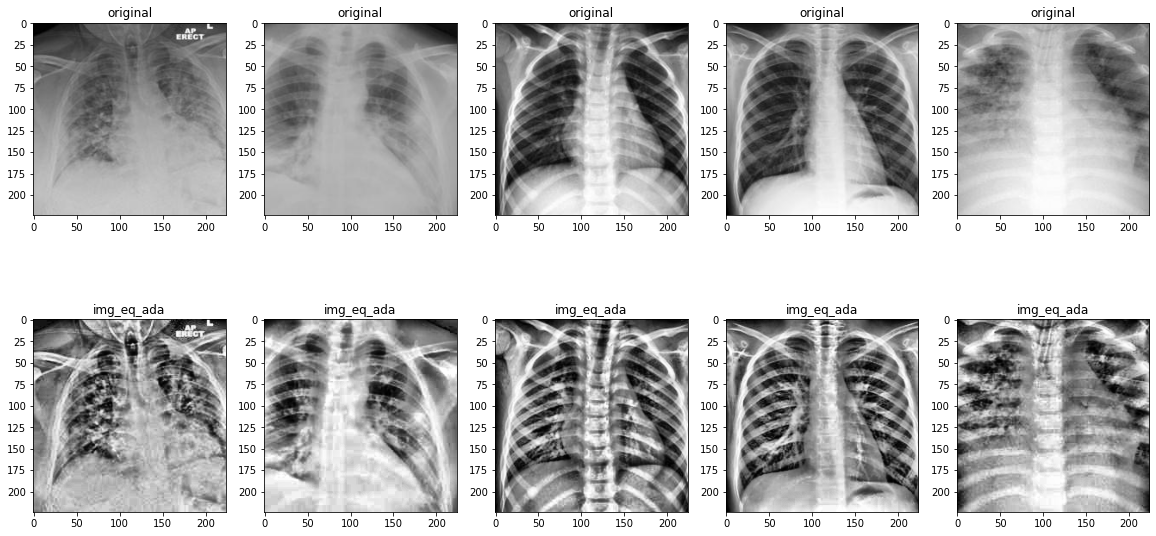

In [116]:
index = {}
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
count = 1
original = 0
img_eq_ada = 5
cut_out2 = 10
for image, label, path in dataset:
    label_name = id_to_class[label]
    if os.path.basename(path).split('.')[0].split('_')[1] not in image_5_dict[label_name.replace(' ','_')][:2]:
        continue
        
    if label not in index:
        index[label] = 1
#     else:
#         continue
        
    images = preprocess_augment_save_data(image)
    for image, title in images:
        if title in ['original', 'img_eq_ada']:
            if title=='original':
                original += 1
                index_ = original
            elif title=='img_eq_ada':
                img_eq_ada += 1
                index_ = img_eq_ada

            plt.subplot(2,5,index_)
            nu = index[label]
            plt.title(title)
            plt.imshow(image)
            count+=1
    if original == 5:
        break
fig.savefig('eda_images\\img_eq_ada'+'.png', format='png', dpi=300)

In [48]:
# augmented data analysis - EDA
#

In [121]:
path = r'H:\dataset\multi'

In [122]:
dataset=ImageFolderWithPaths(path+r'\train')
train_count, _, _, _ = get_meta_data(dataset)
train_count

{'Covid': 620, 'Normal': 430, 'Viral Pneumonia': 490}
{'jpeg': 1540}


{'Covid': 620, 'Normal': 430, 'Viral Pneumonia': 490}

In [123]:
dataset=ImageFolderWithPaths(path+r'\val')
val_count, _, _, _ = get_meta_data(dataset)
val_count

{'Covid': 30, 'Normal': 19, 'Viral Pneumonia': 16}
{'jpeg': 65}


{'Covid': 30, 'Normal': 19, 'Viral Pneumonia': 16}

In [124]:
dataset=ImageFolderWithPaths(path+r'\test')
test_count, _, _, _ = get_meta_data(dataset)
test_count

{'Covid': 40, 'Normal': 28, 'Viral Pneumonia': 25}
{'jpeg': 93}


{'Covid': 40, 'Normal': 28, 'Viral Pneumonia': 25}

In [125]:
train_count = {k:[v] for k,v in train_count.items()}
val_count = {k:[v] for k,v in val_count.items()}
test_count = {k:[v] for k,v in test_count.items()}

In [126]:
import pandas as pd
train_df = pd.DataFrame(train_count)
train_df['category'] = 'train'

val_df = pd.DataFrame(val_count)
val_df['category'] = 'val'

test_df = pd.DataFrame(test_count)
test_df['category'] = 'test'
res_df = pd.concat([train_df, val_df, test_df])
res_df

Covid  Normal  Viral Pneumonia category
0    620     430              490    train
0     30      19               16      val
0     40      28               25     test

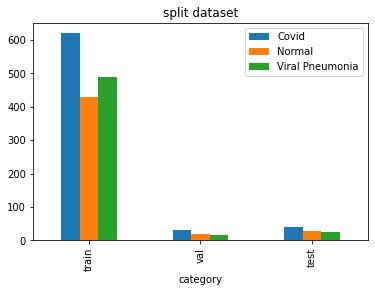

In [127]:
# plot grouped bar chart
# fig = plt.figure(figsize=(30,30))
fig = res_df.plot(x='category',
        kind='bar',
        stacked=False,
        title='split dataset')
fig = fig.get_figure()
fig.savefig('eda_images\\aug_dataset.png', format='png', dpi=300)

In [128]:
#multi_ vs binar classification images

In [129]:
res_df

Covid  Normal  Viral Pneumonia category
0    620     430              490    train
0     30      19               16      val
0     40      28               25     test

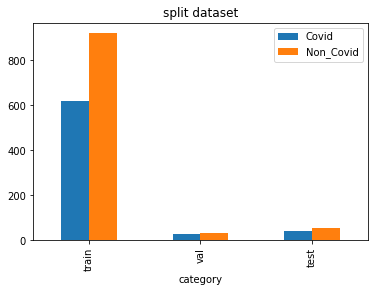

In [130]:
# plot grouped bar chart
# fig = plt.figure(figsize=(30,30))
res_df['Non_Covid'] = res_df['Normal'] + res_df['Viral Pneumonia']
del res_df['Normal'],res_df['Viral Pneumonia']
fig = res_df.plot(x='category',
        kind='bar',
        stacked=False,
        title='split dataset')
fig = fig.get_figure()
fig.savefig('eda_images\\binary_aug_dataset.png', format='png', dpi=300)